In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
#Import Data
KDD_df = pd.read_csv(r'E:/Deakin/SIT720/Assessment 4/Intrusion_detection_NSL_KDD.csv')

## Exploratory Data Analysis

In [3]:
KDD_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune


### Statistical Description

In [4]:
KDD_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148514.000000,1.485140e+05,1.485140e+05,148514.000000,148514.000000,148514.000000,148514.000000,148514.000000,148514.000000,148514.000000,...,148514.000000,148514.000000,148514.000000,148514.0000,148514.000000,148514.000000,148514.000000,148514.000000,148514.000000,148514.000000
mean,276.784896,4.022876e+04,1.708920e+04,0.000215,0.020523,0.000202,0.189383,0.004323,0.402797,0.255067,...,183.927313,119.464791,0.534530,0.0841,0.145929,0.030584,0.256127,0.251310,0.136214,0.136393
std,2460.707669,5.409666e+06,3.703562e+06,0.014677,0.240071,0.019417,2.013180,0.072249,0.490462,22.231599,...,98.528938,111.232425,0.448061,0.1941,0.308637,0.108976,0.428502,0.429722,0.322736,0.335278
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.0200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.0700,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Information

In [5]:
print(KDD_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148514 entries, 0 to 148513
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148514 non-null  int64  
 1   protocol_type                148514 non-null  object 
 2   service                      148514 non-null  object 
 3   flag                         148514 non-null  object 
 4   src_bytes                    148514 non-null  int64  
 5   dst_bytes                    148514 non-null  int64  
 6   land                         148514 non-null  int64  
 7   wrong_fragment               148514 non-null  int64  
 8   urgent                       148514 non-null  int64  
 9   hot                          148514 non-null  int64  
 10  num_failed_logins            148514 non-null  int64  
 11  logged_in                    148514 non-null  int64  
 12  num_compromised              148514 non-null  int64  
 13 

### Missing Values

In [6]:
print(KDD_df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

### Label Distribution

In [7]:
print('Label distribution of dataset:') # Prints the labels amounts within the Dataset. 
print(KDD_df['attack_type'].value_counts())
print()

Label distribution of dataset:
normal             77052
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack          

## Pre-Processing

### Dropping Attack_types not included in modified list

### Mapping

In [8]:
### Map Labels into four types of attack type: DOS, u2r, r2l and probe

#Preprocessing

# Define lists which map the different attack types to four types of attack
dos = ['Back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
u2r = ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
probe = ['ipsweep', 'nmap', 'portsweep', 'satan']
r2l = ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf','spy', 'warezclient', 'warezmaster']

# Define a function which will be applied to the attack types
def encode_attack(vec):
    if vec in dos:
        return "dos"
    elif vec in u2r:
        return "u2r"
    elif vec in probe:
        return "probe"
    elif vec in r2l:
        return "R2L"
    elif vec == 'normal':
        return 'normal'
    else:
        pass
    
# Create a new variable called 'Target' which maps different attack types to the four labels: dos, u2r, probe, r2l

KDD_df['label'] = KDD_df['attack_type'].apply(encode_attack)
KDD_df = KDD_df.drop('attack_type', axis=1)

In [9]:
print('Newly mapped Label distribution of dataset:')
print(KDD_df['label'].value_counts())
print()

Newly mapped Label distribution of dataset:
normal    77052
dos       50352
probe     12762
R2L        3194
u2r          89
Name: label, dtype: int64



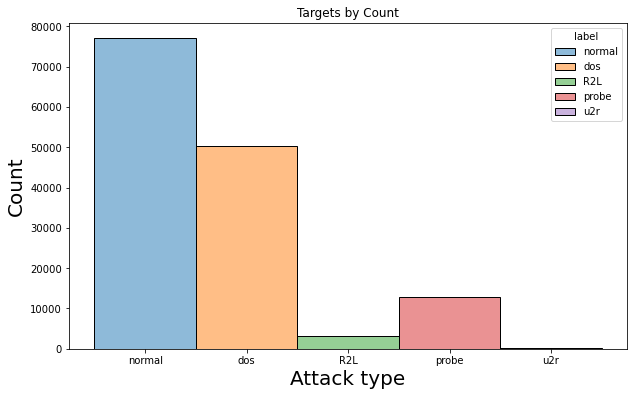

In [10]:
# Plot a histogram of the above distribution of target variables

plt.figure(figsize=(10,6))
ax = sns.histplot(data=KDD_df, x='label',hue='label')
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)
ax.set_title('Targets by Count')
plt.show()

As you can see the mapped label distribution does not exactly match the exact data count for each class found in Kilincer et al (2021) it is worth sampling to fit that particular distribution. The values we want are normal = 6817, dos = 11617, probe = 988, r2l = 3086 and u2r = 53

### Sampling Data

In [11]:
normal = pd.DataFrame(KDD_df['label'] == 'normal')
dos = pd.DataFrame(KDD_df['label'] == 'dos')
r2l = pd.DataFrame(KDD_df['label'] == 'R2L')
probe = pd.DataFrame(KDD_df['label'] == 'probe')
u2r = pd.DataFrame(KDD_df['label'] == 'u2r')

In [12]:
normal = normal[normal['label'] == True]
dos = dos[dos['label'] == True]
r2l = r2l[r2l['label'] == True]
probe = probe[probe['label'] == True]
u2r = u2r[u2r['label'] == True]

In [13]:
normal = pd.DataFrame(normal.sample(n=6817))
dos = pd.DataFrame(dos.sample(n=11617))
r2l = pd.DataFrame(r2l.sample(n=3086))
probe = pd.DataFrame(probe.sample(n=988))
u2r = pd.DataFrame(u2r.sample(n=53))

In [14]:
kdd_sample = pd.concat([normal, dos, r2l, probe, u2r])

In [15]:
KDD_new = KDD_df.loc[kdd_sample.index]

In [16]:
KDD_new['label'].value_counts()

dos       11617
normal     6817
R2L        3086
probe       988
u2r          53
Name: label, dtype: int64

### Encode Cateogrical Variables to Numerical

In [17]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

KDD_new['label'] = LabelEncoder.fit_transform(KDD_new['label'])
KDD_new['protocol_type'] = LabelEncoder.fit_transform(KDD_new['protocol_type'])
KDD_new['service'] = LabelEncoder.fit_transform(KDD_new['service'])
KDD_new['flag'] = LabelEncoder.fit_transform(KDD_new['flag'])

In [18]:
KDD_new = KDD_new.reset_index()

In [19]:
Train_df = KDD_new.drop('label',axis=1)
Test_df = KDD_new['label']

In [20]:
print(Train_df.shape)
print(Test_df.shape)

(22561, 42)
(22561,)


### Standardise Data using MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_X = pd.DataFrame(scaler.fit_transform(Train_df))

### Apply 10 K Cross-Fold and Split Data

In [22]:
### Split the Data into Training and Split Datasets

from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [23]:
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]

## Models

### SVM - Linear

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report

fold = 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]

    model_1 = SVC(kernel='linear')

    # Fit Model
    SVC_1 = model_1.fit(X_train, y_train)

    # Prediction
    SVC1_pred = SVC_1.predict(X_test)

    acc_SVC1 = accuracy_score(y_test, SVC1_pred)
    f1_SVC1 = f1_score(y_test, SVC1_pred, average=None).mean()
    recall_SVC1 = recall_score(y_test, SVC1_pred, average=None).mean()
    precision_SVC1 = precision_score(y_test, SVC1_pred, average=None).mean()
    Classification_report = classification_report(y_test, SVC1_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_SVC1:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9646
--------Fold 1 ------
 our accuracy on the test set is 0.9566
--------Fold 2 ------
 our accuracy on the test set is 0.9676
--------Fold 3 ------
 our accuracy on the test set is 0.9672
--------Fold 4 ------
 our accuracy on the test set is 0.9645
--------Fold 5 ------
 our accuracy on the test set is 0.9659
--------Fold 6 ------
 our accuracy on the test set is 0.9641
--------Fold 7 ------
 our accuracy on the test set is 0.9517
--------Fold 8 ------
 our accuracy on the test set is 0.9597
--------Fold 9 ------
 our accuracy on the test set is 0.9614


In [25]:
print(Classification_report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       305
           1       0.99      1.00      1.00      1145
           2       0.94      0.95      0.94       684
           3       0.95      0.81      0.88       112
           4       0.75      0.30      0.43        10

    accuracy                           0.96      2256
   macro avg       0.91      0.80      0.83      2256
weighted avg       0.96      0.96      0.96      2256



### SVM - Cubic

In [26]:
fold = 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]

    model_2 = SVC(kernel='poly', degree=3) # set degree to 3 for cubic polynomial 

    # Fit Model
    SVC_2 = model_2.fit(X_train, y_train)

    # Prediction
    SVC2_pred = SVC_2.predict(X_test)

    acc_SVC2 = accuracy_score(y_test, SVC2_pred)
    f1_SVC2 = f1_score(y_test, SVC2_pred, average=None).mean()
    recall_SVC2 = recall_score(y_test, SVC2_pred, average=None).mean()
    precision_SVC2 = precision_score(y_test, SVC2_pred, average=None).mean()
    SVC2_report = classification_report(y_test, SVC2_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_SVC2:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9765
--------Fold 1 ------
 our accuracy on the test set is 0.9783
--------Fold 2 ------
 our accuracy on the test set is 0.9818
--------Fold 3 ------
 our accuracy on the test set is 0.9805
--------Fold 4 ------
 our accuracy on the test set is 0.9809
--------Fold 5 ------
 our accuracy on the test set is 0.9801
--------Fold 6 ------
 our accuracy on the test set is 0.9840
--------Fold 7 ------
 our accuracy on the test set is 0.9712
--------Fold 8 ------
 our accuracy on the test set is 0.9770
--------Fold 9 ------
 our accuracy on the test set is 0.9778


In [27]:
print(SVC2_report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       305
           1       0.99      1.00      1.00      1145
           2       0.97      0.96      0.97       684
           3       0.96      0.93      0.95       112
           4       0.75      0.30      0.43        10

    accuracy                           0.98      2256
   macro avg       0.92      0.83      0.86      2256
weighted avg       0.98      0.98      0.98      2256



### SVM - Quadratic 

In [28]:
fold = 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]

    model_3 = SVC(kernel='poly', degree=4) # Set degree to 4 for quadratic polynomial 

    # Fit Model
    SVC_3 = model_3.fit(X_train, y_train)

    # Prediction
    SVC3_pred = SVC_3.predict(X_test)

    acc_SVC3 = accuracy_score(y_test, SVC3_pred)
    f1_SVC3 = f1_score(y_test, SVC3_pred, average=None).mean()
    recall_SVC3 = recall_score(y_test, SVC3_pred, average=None).mean()
    precision_SVC3 = precision_score(y_test, SVC3_pred, average=None).mean()
    SVC3_report = classification_report(y_test, SVC3_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_SVC3:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9774
--------Fold 1 ------
 our accuracy on the test set is 0.9792
--------Fold 2 ------
 our accuracy on the test set is 0.9836
--------Fold 3 ------
 our accuracy on the test set is 0.9823
--------Fold 4 ------
 our accuracy on the test set is 0.9818
--------Fold 5 ------
 our accuracy on the test set is 0.9805
--------Fold 6 ------
 our accuracy on the test set is 0.9832
--------Fold 7 ------
 our accuracy on the test set is 0.9734
--------Fold 8 ------
 our accuracy on the test set is 0.9783
--------Fold 9 ------
 our accuracy on the test set is 0.9814


In [29]:
print(SVC3_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       305
           1       1.00      1.00      1.00      1145
           2       0.97      0.97      0.97       684
           3       0.96      0.93      0.95       112
           4       0.75      0.30      0.43        10

    accuracy                           0.98      2256
   macro avg       0.93      0.83      0.86      2256
weighted avg       0.98      0.98      0.98      2256



### KNN - Fine

In [30]:
from sklearn.neighbors import KNeighborsClassifier

fold= 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]
    
    # Develop Model

    model_4 = KNeighborsClassifier(n_neighbors=1)
    
    # Fit Model
    
    KNN_1 = model_4.fit(X_train, y_train)
    
     # Prediction
    KNN1_pred = KNN_1.predict(X_test)

    acc_KNN1 = accuracy_score(y_test, KNN1_pred)
    f1_KNN1 = f1_score(y_test, KNN1_pred, average=None).mean()
    recall_KNN1 = recall_score(y_test, KNN1_pred, average=None).mean()
    precision_KNN1 = precision_score(y_test, KNN1_pred, average=None).mean()
    KNN1_report = classification_report(y_test, KNN1_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_KNN1:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9867
--------Fold 1 ------
 our accuracy on the test set is 0.9845
--------Fold 2 ------
 our accuracy on the test set is 0.9894
--------Fold 3 ------
 our accuracy on the test set is 0.9894
--------Fold 4 ------
 our accuracy on the test set is 0.9880
--------Fold 5 ------
 our accuracy on the test set is 0.9863
--------Fold 6 ------
 our accuracy on the test set is 0.9840
--------Fold 7 ------
 our accuracy on the test set is 0.9849
--------Fold 8 ------
 our accuracy on the test set is 0.9849
--------Fold 9 ------
 our accuracy on the test set is 0.9836


In [31]:
print(KNN1_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       305
           1       1.00      1.00      1.00      1145
           2       0.98      0.97      0.98       684
           3       0.97      0.96      0.96       112
           4       0.57      0.40      0.47        10

    accuracy                           0.98      2256
   macro avg       0.90      0.86      0.88      2256
weighted avg       0.98      0.98      0.98      2256



### KNN - Medium

In [32]:
fold= 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]
    
    # Develop Model

    model_5 = KNeighborsClassifier(n_neighbors=10)
    
    # Fit Model
    
    KNN_2 = model_5.fit(X_train, y_train)
    
     # Prediction
    KNN2_pred = KNN_2.predict(X_test)

    acc_KNN2 = accuracy_score(y_test, KNN2_pred)
    f1_KNN2 = f1_score(y_test, KNN2_pred, average=None).mean()
    recall_KNN2 = recall_score(y_test, KNN2_pred, average=None).mean()
    precision_KNN2 = precision_score(y_test, KNN2_pred, average=None).mean()
    KNN2_report = classification_report(y_test, KNN2_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_KNN2:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9805
--------Fold 1 ------
 our accuracy on the test set is 0.9792
--------Fold 2 ------
 our accuracy on the test set is 0.9849
--------Fold 3 ------
 our accuracy on the test set is 0.9854
--------Fold 4 ------
 our accuracy on the test set is 0.9832
--------Fold 5 ------
 our accuracy on the test set is 0.9787
--------Fold 6 ------
 our accuracy on the test set is 0.9787
--------Fold 7 ------
 our accuracy on the test set is 0.9801
--------Fold 8 ------
 our accuracy on the test set is 0.9774
--------Fold 9 ------
 our accuracy on the test set is 0.9752


In [33]:
print(KNN2_report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       305
           1       0.99      1.00      1.00      1145
           2       0.98      0.95      0.96       684
           3       0.94      0.94      0.94       112
           4       1.00      0.30      0.46        10

    accuracy                           0.98      2256
   macro avg       0.96      0.83      0.86      2256
weighted avg       0.98      0.98      0.97      2256



### KNN - Coarse

In [34]:
fold= 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]
    
    # Develop Model

    model_6 = KNeighborsClassifier(n_neighbors=10, metric='euclidean', p=4)
    
    # Fit Model
    
    KNN_3 = model_6.fit(X_train, y_train)
    
     # Prediction
    KNN3_pred = KNN_3.predict(X_test)

    acc_KNN3 = accuracy_score(y_test, KNN3_pred)
    f1_KNN3 = f1_score(y_test, KNN3_pred, average=None).mean()
    recall_KNN3 = recall_score(y_test, KNN3_pred, average=None).mean()
    precision_KNN3 = precision_score(y_test, KNN3_pred, average=None).mean()
    KNN3_report = classification_report(y_test, KNN3_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_KNN3:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9805
--------Fold 1 ------
 our accuracy on the test set is 0.9792
--------Fold 2 ------
 our accuracy on the test set is 0.9849
--------Fold 3 ------
 our accuracy on the test set is 0.9854
--------Fold 4 ------
 our accuracy on the test set is 0.9832
--------Fold 5 ------
 our accuracy on the test set is 0.9787
--------Fold 6 ------
 our accuracy on the test set is 0.9787
--------Fold 7 ------
 our accuracy on the test set is 0.9801
--------Fold 8 ------
 our accuracy on the test set is 0.9774
--------Fold 9 ------
 our accuracy on the test set is 0.9752


In [35]:
print(KNN3_report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       305
           1       0.99      1.00      1.00      1145
           2       0.98      0.95      0.96       684
           3       0.94      0.94      0.94       112
           4       1.00      0.30      0.46        10

    accuracy                           0.98      2256
   macro avg       0.96      0.83      0.86      2256
weighted avg       0.98      0.98      0.97      2256



### Decision Tree - Fine

In [36]:
from sklearn.tree import DecisionTreeClassifier

fold= 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]
    
    # Develop Model

    model_7 = DecisionTreeClassifier(max_depth=4)
    
    # Fit Model
    
    DT_1 = model_7.fit(X_train, y_train)
    
     # Prediction
    DT1_pred = DT_1.predict(X_test)

    acc_DT1 = accuracy_score(y_test, DT1_pred)
    f1_DT1 = f1_score(y_test, DT1_pred, average=None).mean()
    recall_DT1 = recall_score(y_test, DT1_pred, average=None).mean()
    precision_DT1 = precision_score(y_test, DT1_pred, average=None).mean()
    DT1_report = classification_report(y_test, DT1_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_DT1:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9220
--------Fold 1 ------
 our accuracy on the test set is 0.9220
--------Fold 2 ------
 our accuracy on the test set is 0.9309
--------Fold 3 ------
 our accuracy on the test set is 0.9304
--------Fold 4 ------
 our accuracy on the test set is 0.9260
--------Fold 5 ------
 our accuracy on the test set is 0.9220
--------Fold 6 ------
 our accuracy on the test set is 0.9357
--------Fold 7 ------
 our accuracy on the test set is 0.9277
--------Fold 8 ------
 our accuracy on the test set is 0.9348
--------Fold 9 ------
 our accuracy on the test set is 0.9229


In [37]:
print(DT1_report)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85       305
           1       0.97      1.00      0.98      1145
           2       0.93      0.86      0.89       684
           3       0.94      0.57      0.71       112
           4       0.00      0.00      0.00        10

    accuracy                           0.92      2256
   macro avg       0.72      0.68      0.69      2256
weighted avg       0.92      0.92      0.92      2256



### Decision Tree - Medium

In [38]:
fold= 0
for train_index, test_index in kfold.split(scaled_X, Test_df):
    X_train = scaled_X.loc[train_index]
    y_train = Test_df.loc[train_index]

    X_test = scaled_X.loc[test_index]
    y_test = Test_df.loc[test_index]
    
    # Develop Model

    model_8 = DecisionTreeClassifier(max_depth=20)
    
    # Fit Model
    
    DT_2 = model_8.fit(X_train, y_train)
    
     # Prediction
    DT2_pred = DT_2.predict(X_test)

    acc_DT2 = accuracy_score(y_test, DT2_pred)
    f1_DT2 = f1_score(y_test, DT2_pred, average=None).mean()
    recall_DT2 = recall_score(y_test, DT2_pred, average=None).mean()
    precision_DT2 = precision_score(y_test, DT2_pred, average=None).mean()
    DT2_report = classification_report(y_test, DT2_pred)


    print(f"--------Fold {fold} ------")
    print(f" our accuracy on the test set is {acc_DT2:0.4f}")
    fold += 1

--------Fold 0 ------
 our accuracy on the test set is 0.9880
--------Fold 1 ------
 our accuracy on the test set is 0.9916
--------Fold 2 ------
 our accuracy on the test set is 0.9938
--------Fold 3 ------
 our accuracy on the test set is 0.9849
--------Fold 4 ------
 our accuracy on the test set is 0.9871
--------Fold 5 ------
 our accuracy on the test set is 0.9894
--------Fold 6 ------
 our accuracy on the test set is 0.9951
--------Fold 7 ------
 our accuracy on the test set is 0.9854
--------Fold 8 ------
 our accuracy on the test set is 0.9880
--------Fold 9 ------
 our accuracy on the test set is 0.9840


In [39]:
print(DT2_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       305
           1       0.99      1.00      1.00      1145
           2       0.99      0.98      0.98       684
           3       0.95      0.94      0.95       112
           4       0.50      0.40      0.44        10

    accuracy                           0.98      2256
   macro avg       0.88      0.86      0.87      2256
weighted avg       0.98      0.98      0.98      2256



<Figure size 2400x1800 with 0 Axes>

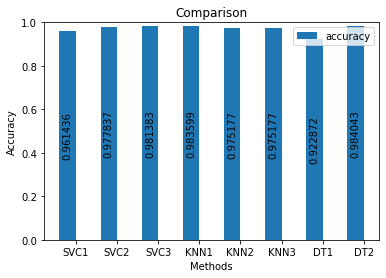

In [40]:
acc = [acc_SVC1, acc_SVC2, acc_SVC3, acc_KNN1, acc_KNN2, acc_KNN3, acc_DT1, acc_DT2]
f1 = [f1_SVC1, f1_SVC2, f1_SVC3, f1_KNN1, f1_KNN2, f1_KNN3, f1_DT1, f1_DT2]
recall = [recall_SVC1, recall_SVC2, recall_SVC3, recall_KNN1, recall_KNN2, recall_KNN3, recall_DT1, recall_DT2]
precision = [precision_SVC1, precision_SVC2, precision_SVC3, precision_KNN1, precision_KNN2, precision_KNN3, precision_DT1, precision_DT2]

labels = ['SVC1', 'SVC2', 'SVC3', 'KNN1', 'KNN2', 'KNN3', 'DT1', 'DT2']

x = np.arange(len(acc)) # Label locations
width = 0.40 # Width of the bars in the graph

plt.figure(figsize=(8,6), dpi=300)

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc, width, label='accuracy')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Methods')
ax.set_title('Comparison')
ax.bar_label(rects1, rotation = 90, label_type='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(top = 1)
ax.legend( loc='best')

plt.show()

<Figure size 7000x3500 with 0 Axes>

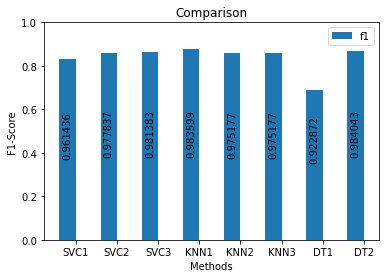

In [41]:
x = np.arange(len(acc)) # Label locations
width = 0.40 # Width of the bars in the graph

plt.figure(figsize=(20,10), dpi=350)

fig, ax = plt.subplots()
rects2 = ax.bar(x - width/2, f1, width, label='f1')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score')
ax.set_xlabel('Methods')
ax.set_title('Comparison')
ax.bar_label(rects1, rotation = 90, label_type='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(top = 1)
ax.legend( loc='best')

plt.show()

<Figure size 1500x900 with 0 Axes>

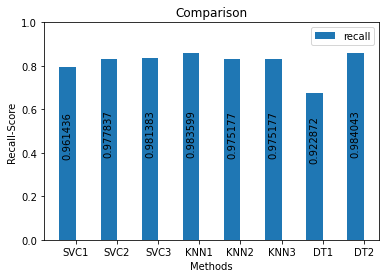

In [42]:
x = np.arange(len(acc)) # Label locations
width = 0.40 # Width of the bars in the graph

plt.figure(figsize=(10,6), dpi=150)

fig, ax = plt.subplots()
rects3 = ax.bar(x - width/2, recall, width, label='recall')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Recall-Score')
ax.set_xlabel('Methods')
ax.set_title('Comparison')
ax.bar_label(rects1, rotation = 90, label_type='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(top = 1)
ax.legend( loc='best')

plt.show()

<Figure size 1500x900 with 0 Axes>

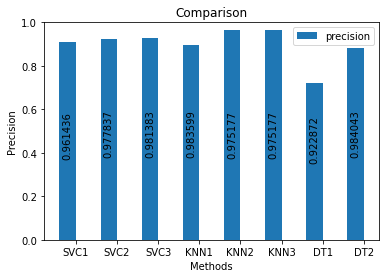

In [43]:
x = np.arange(len(acc)) # Label locations
width = 0.40 # Width of the bars in the graph

plt.figure(figsize=(10,6), dpi=150)

fig, ax = plt.subplots()
rects4 = ax.bar(x - width/2, precision, width, label='precision')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision')
ax.set_xlabel('Methods')
ax.set_title('Comparison')
ax.bar_label(rects1, rotation = 90, label_type='center')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(top = 1)
ax.legend( loc='best')

plt.show()

In [44]:
acc = [acc_SVC1, acc_SVC2, acc_SVC3, acc_KNN1, acc_KNN2, acc_KNN3, acc_DT1, acc_DT2]
f1 = [f1_SVC1, f1_SVC2, f1_SVC3, f1_KNN1, f1_KNN2, f1_KNN3, f1_DT1, f1_DT2]
recall = [recall_SVC1, recall_SVC2, recall_SVC3, recall_KNN1, recall_KNN2, recall_KNN3, recall_DT1, recall_DT2]
precision = [precision_SVC1, precision_SVC2, precision_SVC3, precision_KNN1, precision_KNN2, precision_KNN3, precision_DT1, precision_DT2]

labels = ['SVC1', 'SVC2', 'SVC3', 'KNN1', 'KNN2', 'KNN3', 'DT1', 'DT2']

In [45]:
Accuracy_Table = pd.DataFrame([acc, f1, recall, precision], columns=labels, index=['accuracy', 'F1', 'recall', 'precision'])

In [46]:
Accuracy_Table

,SVC1,SVC2,SVC3,KNN1,KNN2,KNN3,DT1,DT2
accuracy,0.961436,0.977837,0.981383,0.983599,0.975177,0.975177,0.922872,0.984043
F1,0.831894,0.858310,0.861401,0.875268,0.860409,0.860409,0.687521,0.867807
recall,0.796528,0.831847,0.834549,0.860562,0.831949,0.831949,0.676233,0.857986
precision,0.907945,0.923557,0.926987,0.896077,0.964669,0.964669,0.721764,0.879899


## Question 5

### (i)	Motivation behind the proposed solution

In this solution I use a random forest classifer to select key features within the NSL-KDD dataframe. By using 'Gini impurity' we can see how a feature is important to the classification of our label class. After deciding such features, we develop a model with a trimmed down dataset (using only those selected features) and apply it to a Support Vector Machine classifier.

### (ii)	How the proposed solution is different from existing ones.

While things like sampling, mapping and the basic algorithm that the data will be modelled on are the same. I use a normalisation scale instead of min-max, and I use a GridSearchCV to search for the best parameters to fit the model. I use a standard train/test/split instead of a 10 K fold as detailed in Question 4. 

In [47]:
KDD_Q5 = pd.read_csv(r'E:/Deakin/SIT720/Assessment 4/Intrusion_detection_NSL_KDD.csv')

#### Mapping

In [48]:
# Define lists which map the different attack types to four types of attack
dos = ['Back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
u2r = ['buffer_overflow', 'loadmodule', 'perl', 'rootkit']
probe = ['ipsweep', 'nmap', 'portsweep', 'satan']
r2l = ['ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf','spy', 'warezclient', 'warezmaster']

# Define a function which will be applied to the attack types
def encode_attack(vec):
    if vec in dos:
        return "dos"
    elif vec in u2r:
        return "u2r"
    elif vec in probe:
        return "probe"
    elif vec in r2l:
        return "R2L"
    elif vec == 'normal':
        return 'normal'
    else:
        pass

# Create a new variable called 'Target' which maps different attack types to the four labels: dos, u2r, probe, r2l

KDD_Q5['label'] = KDD_Q5['attack_type'].apply(encode_attack) 
KDD_Q5 = KDD_Q5.drop('attack_type', axis=1)

In [49]:
KDD_Q5

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148509,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148510,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148511,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,None
148512,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


#### Sampling

In [50]:
normal = pd.DataFrame(KDD_Q5['label'] == 'normal')
dos = pd.DataFrame(KDD_Q5['label'] == 'dos')
r2l = pd.DataFrame(KDD_Q5['label'] == 'R2L')
probe = pd.DataFrame(KDD_Q5['label'] == 'probe')
u2r = pd.DataFrame(KDD_Q5['label'] == 'u2r')

normal = normal[normal['label'] == True]
dos = dos[dos['label'] == True]
r2l = r2l[r2l['label'] == True]
probe = probe[probe['label'] == True]
u2r = u2r[u2r['label'] == True]

normal = pd.DataFrame(normal.sample(n=6817))
dos = pd.DataFrame(dos.sample(n=11617))
r2l = pd.DataFrame(r2l.sample(n=3086))
probe = pd.DataFrame(probe.sample(n=988))
u2r = pd.DataFrame(u2r.sample(n=53))

kddq5_sample = pd.concat([normal, dos, r2l, probe, u2r])

KDDq5_new = KDD_Q5.loc[kddq5_sample.index]

KDDq5_new['label'].value_counts()

dos       11617
normal     6817
R2L        3086
probe       988
u2r          53
Name: label, dtype: int64

#### Encoding

In [51]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

KDDq5_new['label'] = LabelEncoder.fit_transform(KDDq5_new['label'])
KDDq5_new['protocol_type'] = LabelEncoder.fit_transform(KDDq5_new['protocol_type'])
KDDq5_new['service'] = LabelEncoder.fit_transform(KDDq5_new['service'])
KDDq5_new['flag'] = LabelEncoder.fit_transform(KDDq5_new['flag'])

KDDq5_new = KDDq5_new.reset_index()

Train_df = KDDq5_new.drop('label',axis=1)
Test_df = KDDq5_new['label']

print(Train_df.shape)
print(Test_df.shape)

(22561, 42)
(22561,)


#### Scaling 

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(Train_df)

### Feature Selection

In [53]:
# Feature Selection using Random Forest
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [54]:
Selection = SelectFromModel(RandomForestClassifier(n_estimators = 100, n_jobs=7))
Selection.fit(Train_df, Test_df)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=7))

In [55]:
Selection.get_support()

array([ True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False])

In [56]:
selected_feat= Train_df.columns[(Selection.get_support())]
print(selected_feat)

Index(['index', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
       'logged_in', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate'],
      dtype='object')


In [57]:
Train_df_new = Train_df[['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
                            'logged_in', 'count', 'srv_count', 'same_srv_rate', 'diff_srv_rate',
                            'dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 
                            'dst_host_same_src_port_rate','dst_host_serror_rate']]

In [58]:
Train_df_new

,protocol_type,service,flag,src_bytes,dst_bytes,logged_in,count,srv_count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate
0,1,22,9,229,40100,1,3,3,1.0,0.0,255,1.00,0.00,0.01,0.00
1,1,19,9,0,2416,0,1,12,1.0,0.0,89,0.33,0.06,0.00,0.02
2,1,22,9,204,882,1,14,14,1.0,0.0,255,1.00,0.00,0.00,0.00
3,1,22,9,217,633,1,1,24,1.0,0.0,255,1.00,0.00,0.01,0.00
4,1,49,9,1008,335,1,1,2,1.0,0.0,187,0.72,0.03,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22556,1,19,9,0,2072,1,3,3,1.0,0.0,84,1.00,0.00,1.00,0.00
22557,1,19,9,0,5690,1,1,1,1.0,0.0,1,1.00,0.00,1.00,0.00
22558,1,55,9,258,2625,1,1,1,1.0,0.0,2,0.04,0.21,0.04,0.00
22559,1,19,9,0,2072,1,3,3,1.0,0.0,4,1.00,0.00,1.00,0.00


### PreProcess Selected Features

#### Split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(Train_df_new, Test_df, test_size=0.33)

#### Model

In [60]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

#### (iii) Detail description of the model including all parameters so that any reader can implement your model

The model is built by first determining the best features to select. This was done by building a random forest classifier with n_estimators = 100, and n_jobs =7.The data had previously been scaled and mapped in according with the methods found in Kilincer et al (2021). The algorithm used in the model is a Gradient Boosting Classifier. The parameters within the model are n_estimators= 100, learning_rate = 1.0, max_depth = 1.This model builds an additive model in forward stage-wise fashion allowing for the optimization of arbitrary differentiable loss functions. At each stage regression trees are fit on the negative gradient of the loss function.

#### Score and Prediction

In [62]:
# Prediction
clf_pred = clf.predict(X_test)

acc_rndclf = accuracy_score(y_test, clf_pred)
f1_rndclf = f1_score(y_test, clf_pred, average=None).mean()
recall_rndclf = recall_score(y_test, clf_pred, average=None).mean()
precision_rndclf = precision_score(y_test, clf_pred, average=None).mean()
rndclf_report = classification_report(y_test, clf_pred)

In [63]:
print(rndclf_report)

              precision    recall  f1-score   support

           0       0.66      0.94      0.78      1010
           1       0.98      0.98      0.98      3846
           2       0.93      0.87      0.90      2237
           3       0.97      0.21      0.35       336
           4       0.00      0.00      0.00        17

    accuracy                           0.90      7446
   macro avg       0.71      0.60      0.60      7446
weighted avg       0.92      0.90      0.90      7446



In [64]:
Accuracy_Table = pd.DataFrame([acc_rndclf, f1_rndclf, recall_rndclf, precision_rndclf], columns=['Random Forest'], index=['Acc', 'F1', 'Recall', 'Precision'])

#### (v) Evaluation metrics

In [65]:
print(Accuracy_Table)

           Random Forest
Acc             0.903304
F1              0.601373
Recall          0.600855
Precision       0.709131


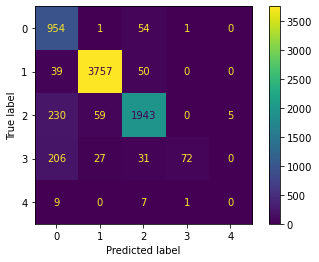

In [67]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)